In [2]:
import matplotlib.pyplot as plotter_lib
import numpy as np
import PIL as image_lib
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
# from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data_directory = "/kaggle/input/cgiar-crop-damage-classification/train"

In [4]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                    validation_split=0.2,
                                                                    subset="training",
                                                                    seed=123,
                                                                    label_mode='categorical',
                                                                    image_size=(img_height, img_width),
                                                                    batch_size=batch_size)

Found 20854 files belonging to 5 classes.
Using 16684 files for training.


In [5]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory( data_directory,
                                                                        validation_split=0.2,
                                                                        subset="validation",
                                                                        seed=123,
                                                                        label_mode='categorical',
                                                                        image_size=(img_height, img_width),
                                                                        batch_size=batch_size)

Found 20854 files belonging to 5 classes.
Using 4170 files for validation.


tf.Tensor([0. 0. 0. 1. 0.], shape=(5,), dtype=float32)
tf.Tensor([0. 1. 0. 0. 0.], shape=(5,), dtype=float32)
tf.Tensor([0. 1. 0. 0. 0.], shape=(5,), dtype=float32)
tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)
tf.Tensor([0. 0. 0. 1. 0.], shape=(5,), dtype=float32)
tf.Tensor([0. 0. 0. 1. 0.], shape=(5,), dtype=float32)


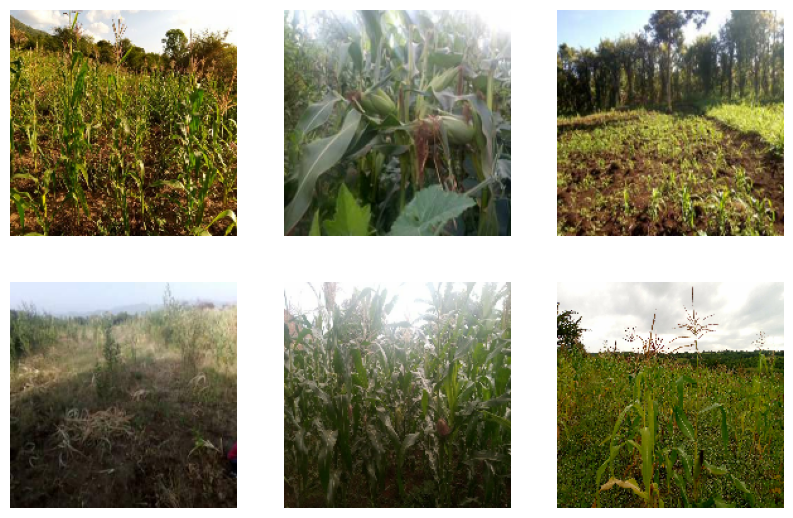

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
epochs=10
for images, labels in train_ds.take(1):
    for var in range(6):
        ax = plotter_lib.subplot(3, 3, var + 1)
        plt.imshow(images[var].numpy().astype("uint8"))
        plt.axis("off")
        print(labels[var])

In [7]:
pretrained_model_resnet= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')

for each_layer in pretrained_model_resnet.layers:
        each_layer.trainable=False

94765736/94765736 [==============================] - 4s 0us/step


In [8]:
resnet_model = Sequential()
resnet_model.add(pretrained_model_resnet)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [10]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs, batch_size=128)

Epoch 1/10
522/522 [==============================] - 144s 263ms/step - loss: 0.9724 - accuracy: 0.5963 - val_loss: 0.8608 - val_accuracy: 0.6379
Epoch 2/10
522/522 [==============================] - 114s 215ms/step - loss: 0.8291 - accuracy: 0.6483 - val_loss: 0.9068 - val_accuracy: 0.6321
Epoch 3/10
522/522 [==============================] - 114s 215ms/step - loss: 0.7985 - accuracy: 0.6566 - val_loss: 0.9006 - val_accuracy: 0.6151
Epoch 4/10
522/522 [==============================] - 114s 215ms/step - loss: 0.7639 - accuracy: 0.6727 - val_loss: 0.8437 - val_accuracy: 0.6520
Epoch 5/10
522/522 [==============================] - 113s 214ms/step - loss: 0.7289 - accuracy: 0.6897 - val_loss: 0.8593 - val_accuracy: 0.6436
Epoch 6/10
522/522 [==============================] - 114s 215ms/step - loss: 0.6621 - accuracy: 0.7226 - val_loss: 0.9070 - val_accuracy: 0.6410
Epoch 8/10
522/522 [==============================] - 112s 211ms/step - loss: 0.6290 - accuracy: 0.7343 - val_loss: 0.9237 -

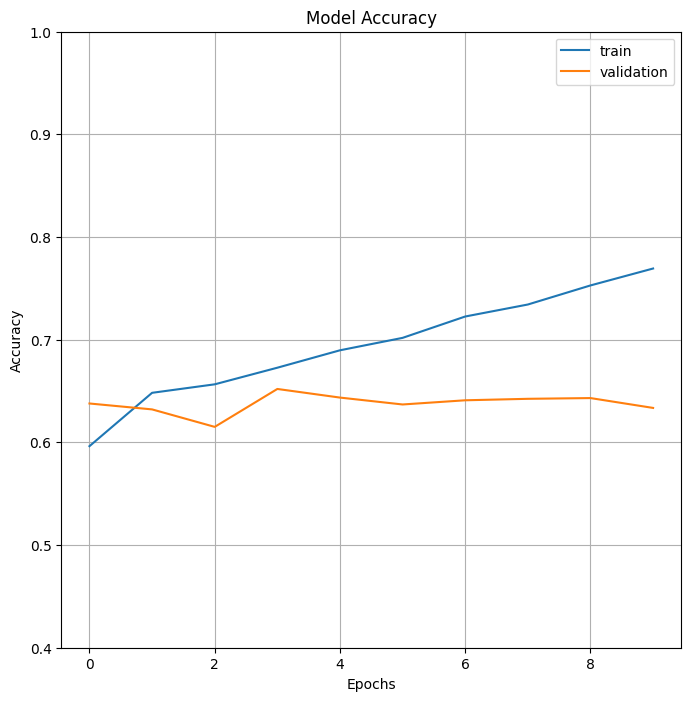

In [14]:
plt.figure(figsize=(8, 8))
epochs_range= range(epochs)
plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")
plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

In [16]:
from sklearn.metrics import classification_report

def get_true_and_predicted_labels(model, dataset):
    true_labels = []
    predicted_labels = []

    for images, labels in dataset:
        true_labels.extend(tf.argmax(labels, axis=1).numpy())
        predictions = model.predict(images, verbose=2)
        predicted_labels.extend(tf.argmax(predictions, axis=1).numpy())

    return true_labels, predicted_labels

true_labels, predicted_labels = get_true_and_predicted_labels(resnet_model, validation_ds)


1/1 - 0s - 41ms/epoch - 41ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 34ms/epoch - 34ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 34ms/epoch - 34ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 35ms/epoch - 35ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 39ms/epoch - 39ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 31m

In [17]:
# Print classification report
class_names = [str(i) for i in range(5)]  # Replace with your actual class names
print(classification_report(true_labels, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       677
           1       0.63      0.75      0.69      1837
           2       0.29      0.04      0.07        48
           3       0.64      0.56      0.60      1523
           4       0.80      0.09      0.17        85

    accuracy                           0.63      4170
   macro avg       0.60      0.41      0.43      4170
weighted avg       0.63      0.63      0.62      4170



In [ ]:
import tensorflow as tf
import numpy as np 
from PIL import Image

model = tf.saved_model.load('/kaggle/input/cgiar-crop-damage-classification-mobilenet/MobileNet')
classes = [ "DR" ,  "G" ,  "ND" ,  "other" ,  "WD" , ]

In [ ]:
Id=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/cgiar-crop-damage-classification/train'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:5]

In [ ]:
train=pd.DataFrame()
train=train.assign(filename=Id)
train.head()

In [ ]:
train['label']=train['filename']
train['label']=train['label'].str.replace('/kaggle/input/cgiar-crop-damage-classification/train/','')
train.head()

In [ ]:
train['label'] = train['label'].str.split('/').str[0]
train.head()

In [ ]:
Id=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/cgiar-crop-damage-classification/test'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:5]

In [ ]:
test=pd.DataFrame()
test=test.assign(filename=Id)
test.head()

In [ ]:
test['label']=test['filename']
test['label']=test['label'].str.replace('/kaggle/input/cgiar-crop-damage-classification/test/','')
test.head()

In [ ]:
test['label'] = test['label'].str.split('/').str[0]
test.head()

In [ ]:
result=[]
for i in test.filename:
    img = Image.open(i).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')
    class_scores = model(inp)[0].numpy()
    result.append(classes[class_scores.argmax()])
result[:5]

In [ ]:
test=test.assign(prediction=result)
test.head()

In [ ]:
result=[]
for i in train.filename:
    img = Image.open(i).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')
    class_scores = model(inp)[0].numpy()
    result.append(classes[class_scores.argmax()])
result[:5]

In [ ]:
train=train.assign(prediction=result)
train.head()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['label'],train['prediction']))

In [ ]:
print(classification_report(test['label'],test['prediction']))

In [ ]:
sol=pd.read_csv('/kaggle/input/cgiar-crop-damage-classification/test.csv')
sol.head()

In [ ]:
sol['filename']='/kaggle/input/cgiar-crop-damage-classification/sol/'+sol['filename']
sol.head()

In [ ]:
sol_= pd.DataFrame(columns=classes)
for i in sol['filename']:
    img = Image.open(i).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')
    class_scores = model(inp)[0].numpy()
    class_scores = class_scores.reshape(1, -1)  # Reshape to (1, 4)
    df = pd.DataFrame(class_scores, columns=classes)
    sol_=pd.concat([sol_, df], axis=0)
sol_.head()

In [ ]:
sol=sol[['ID']]
sol.head()

In [ ]:
sol_.reset_index(drop=True,inplace=True)
sol_.head()

In [ ]:
sol_['ID']=sol['ID']
sol_.head()

In [ ]:
solution=pd.read_csv('/kaggle/input/zindidata/SampleSubmission.csv')
solution.head()

In [ ]:
sol=sol_.loc[:,solution.columns.tolist()]
sol.head()

In [ ]:
solution=solution[['ID']]
solution.head()

In [ ]:
sol = pd.merge(solution, sol, on=['ID'], how='inner')
sol.head()

In [ ]:
sol.to_csv('./MobileNet.csv',index=False)